In [1]:
from os import listdir
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from PIL import Image
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

C:\Users\Rock_\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
def load_photos(directory):
    images = []
    labels = []
    for name in listdir(directory):
        filename = directory + '/' + name
        # load an image from file
        image = load_img(filename, target_size=(128, 160))
        # convert the image pixels to a numpy array
        image = img_to_array(image)
        # get image id + labels
        value = name.split('_')[0]
        if value == '0':
            value = 0
        elif value == '1':
            value = 1
        labels.append(value)
        images.append(image)
    return images, labels

In [24]:
#dataset = 'Dataset_cleaned'
#dataset = 'RichDataset'
dataset = 'BigDataset'

In [25]:
# load images from both train and test groups
directory = '../../../Patate_data/data/'+dataset+'-anticipation/Train'
images, labels = load_photos(directory)
nb_images = len(images)
print('Loaded Images and labels for training: %d' % nb_images)
directory = '../../../Patate_data/data/'+dataset+'-anticipation/Val'
images_val, labels_val = load_photos(directory)
nb_images_val = len(images_val)
print('Loaded Images and labels for validation: %d' % nb_images_val)

Loaded Images and labels for training: 794
Loaded Images and labels for validation: 82


In [26]:
#normalise datas
images = np.array(images)
images = images[:, 40:58, :, :]
images /= 255
images_val = np.array(images_val)
images_val = images_val[:, 40:58, :, :]
images_val /= 255

((794, 18, 160, 3), <matplotlib.image.AxesImage at 0x23bc0db30f0>)

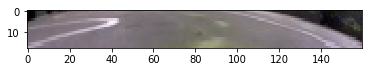

In [27]:
images.shape, plt.imshow(images[104])

In [28]:
#convert labels to np.array
labels = np.array(labels)
labels_val = np.array(labels_val)

In [29]:
#convert datas to dummyvalues
labelsd = pd.get_dummies(labels)

In [30]:
labelsd.shape, labelsd

((794, 2),      0  1
 0    1  0
 1    1  0
 2    1  0
 3    1  0
 4    1  0
 5    1  0
 6    1  0
 7    1  0
 8    1  0
 9    1  0
 10   1  0
 11   1  0
 12   1  0
 13   1  0
 14   1  0
 15   1  0
 16   1  0
 17   1  0
 18   1  0
 19   1  0
 20   1  0
 21   1  0
 22   1  0
 23   1  0
 24   1  0
 25   1  0
 26   1  0
 27   1  0
 28   1  0
 29   1  0
 ..  .. ..
 764  0  1
 765  0  1
 766  0  1
 767  0  1
 768  0  1
 769  0  1
 770  0  1
 771  0  1
 772  0  1
 773  0  1
 774  0  1
 775  0  1
 776  0  1
 777  0  1
 778  0  1
 779  0  1
 780  0  1
 781  0  1
 782  0  1
 783  0  1
 784  0  1
 785  0  1
 786  0  1
 787  0  1
 788  0  1
 789  0  1
 790  0  1
 791  0  1
 792  0  1
 793  0  1
 
 [794 rows x 2 columns])

In [31]:
#convert to np.array again
labelsd = np.array(labelsd)

In [32]:
from keras.models import Model, Sequential
from keras.layers import *
import keras.backend as K
import keras.optimizers as Optimizers

In [33]:
#from keras.models import load_model
#model = load_model('model-anticipation.h5')

In [34]:
K.clear_session()

img_in = Input(shape=(18, 160, 3), name='img_in')

x = img_in

x = Convolution2D(8, (4,4), strides=(4,4), activation='relu')(x)
x = Convolution2D(8, (4,4), strides=(4,4), activation='relu')(x)
#x = Convolution2D(8, (4,4), strides=(4,4), activation='relu')(x)
#x = Convolution2D(128, (3,3), strides=(4,4), activation='relu')(x)

flat = Flatten()(x)

x = Dense(20)(flat)
x = Activation('relu')(x)

#categorical output
out = Dense(2, activation='softmax')(x)

model = Model(inputs=[img_in], outputs=[out])
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [35]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
img_in (InputLayer)          (None, 18, 160, 3)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 4, 40, 8)          392       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 1, 10, 8)          1032      
_________________________________________________________________
flatten_1 (Flatten)          (None, 80)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 20)                1620      
_________________________________________________________________
activation_1 (Activation)    (None, 20)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 42        
Total para

In [41]:
h = model.fit(images, labelsd, batch_size=32, epochs=50, verbose=1)

Epoch 1/50
794/794 [==============================] - 0s 118us/step - loss: 0.0156 - acc: 1.0000
Epoch 2/50
794/794 [==============================] - 0s 147us/step - loss: 0.0157 - acc: 0.9987
Epoch 3/50
794/794 [==============================] - 0s 126us/step - loss: 0.0136 - acc: 1.0000
Epoch 4/50
794/794 [==============================] - 0s 157us/step - loss: 0.0173 - acc: 0.9987
Epoch 5/50
794/794 [==============================] - 0s 123us/step - loss: 0.0153 - acc: 0.9987
Epoch 6/50
794/794 [==============================] - 0s 119us/step - loss: 0.0155 - acc: 0.9987
Epoch 7/50
794/794 [==============================] - 0s 142us/step - loss: 0.0129 - acc: 1.0000
Epoch 8/50
794/794 [==============================] - 0s 123us/step - loss: 0.0117 - acc: 1.0000
Epoch 9/50
794/794 [==============================] - 0s 144us/step - loss: 0.0108 - acc: 1.0000
Epoch 10/50
794/794 [==============================] - 0s 146us/step - loss: 0.0111 - acc: 1.0000
Epoch 11/50
794/794 [========

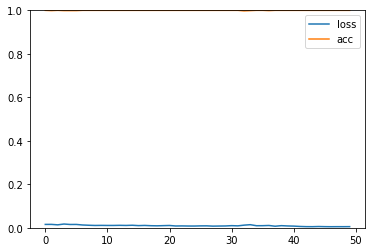

In [42]:
#print History graph
historydf = pd.DataFrame(h.history, index=h.epoch)
historydf.plot(ylim=(0,1))

In [43]:
# Get predictions
all_preds = np.argmax(model.predict(images_val), axis=1)

all_preds, labels_val

(array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
        0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
        1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1], dtype=int64),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]))

In [44]:
import math
i = 0
res = 0
for value in all_preds:
    if value != labels_val[i]:
        res = res + 1
    i = i + 1
res/i

0.1951219512195122

In [45]:
model.save('model-'+dataset+'-anticipation_clean.h5')